## Linear Regression

Fit a line to your data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 50

In [3]:
x = np.linspace(0, 10, n)
y = 0.2 * x + 2 + np.random.normal(size=(n,))

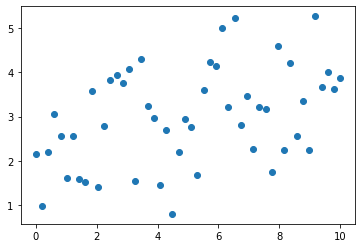

In [4]:
plt.scatter(x,y)

In [5]:
x_hat = x.mean()
y_hat = y.mean()
x_std = x.std()
y_std = y.std()
r     = np.corrcoef(x, y)[0,1]

The best fit line has a slope of r * ( y_std / x_std ) and must pass through ( x_hat, y_hat ).

In [6]:
def l(x): return (r *(y_std/x_std)*(x-x_hat)) + y_hat

In [7]:
a = np.linspace(0,10,100)

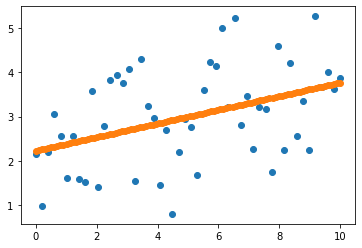

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x,y)
ax1.scatter(a, l(a))
plt.show()

## Ok, this is nice but let's derive it from scratch!

### Loss function

The loss function describes how good our model is. In this case we can describe the loss as the mean squared distance of all data points to our predicted line.

Our model: $y(x) = b_0 + b_1x$

Loss function: 

$\dfrac{1}{n}\sum_{n=1}^{N}(y-\hat{y_i})^2 = \dfrac{1}{n}\sum_{n=1}^{N}(y-b_0-b_1x)^2$

We now need to find b0 and b1 that minimize this Loss function. For this we need to find the following derivatives and set them to zero. The good thing about our Loss function is that it is quadratic so it is convex and we can find the global minimum.

$\frac{\partial L}{\partial b_0},$
$\frac{\partial L}{\partial b_1}$

## Deriving $b_0$

$\frac{\partial L}{\partial b_0} =  \dfrac{-2}{n}\sum_{i=1}^{N}(y_i-b_0-b_1x_i)$

$0 = \dfrac{-2}{n}\sum_{i=1}^{N}(y_i-b_0-b_1x_i)$

$0 = \sum_{i=1}^{N}(y_i-b_0-b_1x_i)$

$0 = \sum_{i=1}^{N}(y_i)-\sum_{i=1}^{N}(b_0)-b_1\sum_{i=1}^{N}(x_i)$

$0 = \sum_{i=1}^{N}(y_i)-(b_0*N)-b_1\sum_{i=1}^{N}(x_i)$

$b_0*N = \sum_{i=1}^{N}(y_i)-b_1\sum_{i=1}^{N}(x_i)$

$b_0 = \dfrac{\sum_{i=1}^{N}(y_i)-b_1\sum_{i=1}^{N}(x_i)}{N}$

$b_0 = \bar{y}-b_1\bar{x}$

## Deriving $b_1$

$\frac{\partial L}{\partial b_1} = \dfrac{-2}{n}\sum_{i=1}^{N}(y_i-b_0-b_1x_i)*x_i$

$0 = \dfrac{-2}{n}\sum_{i=1}^{N}(y_i-b_0-b_1x_i)*x_i$

$0 = \sum_{i=1}^{N}(y_i-b_0-b_1x_i)*x_i$

$0 = \sum_{i=1}^{N}(y_ix_i-b_0x_i-b_1x_i^2)$

Here we substitute $b_0$

$0 = \sum_{i=1}^{N}(y_ix_i-(\bar{y}-b_1\bar{x})x_i-b_1x_i^2)$

$0 = \sum_{i=1}^{N}(y_ix_i-\bar{y}x_i+b_1\bar{x}x_i-b_1x_i^2)$


$0 = \sum_{i=1}^{N}(y_ix_i-\bar{y}x_i)+\sum_{i=1}^{N}(b_1\bar{x}x_i-b_1x_i^2)$

$0 = \sum_{i=1}^{N}(y_ix_i-\bar{y}x_i)-b_1\sum_{i=1}^{N}(-\bar{x}x_i+x_i^2)$

$b_1\sum_{i=1}^{N}(-\bar{x}x_i+x_i^2) = \sum_{i=1}^{N}(y_ix_i-\bar{y}x_i)$

$b_1 = \dfrac{\sum_{i=1}^{N}(y_ix_i-\bar{y}x_i)}{\sum_{i=1}^{N}(-\bar{x}x_i+x_i^2)}$

Now we can calculate $b_0$ and $b_1$ and create our model.

In [9]:
nom = sum(((x*y)-(y_hat*x)))
den = sum((np.square(x)-(x_hat*x)))

In [10]:
b1 = nom/den
b0 = y_hat-(b1*x_hat)

In [11]:
def l(x): return b0 + b1*x

In [12]:
a = np.linspace(0,10,100)

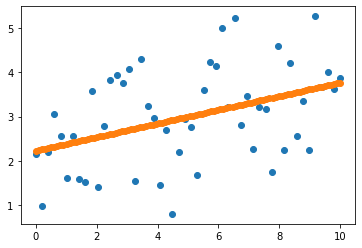

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x,y)
ax1.scatter(a, l(a))
plt.show()

## Compare our derived Linear Regression with scikit-learn

In [67]:
def eq(x1, x2): return np.abs(x1 - x2) < 1e-5

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
reg = LinearRegression().fit(x.reshape(-1,1), y)

In [70]:
assert eq(reg.coef_, b1)

In [71]:
assert eq(reg.intercept_, b0)